<img src="./img/logo_UTN.svg" align="right" width="300" />

# Informe TPLAB1 - Teoría de Circuitos 2
### Autor: Santiago Palozzo


| <!-- -->      | <!-- -->        |
|:-------------:|:---------------:|
| **Curso**| R4001|
| **Docente**| Mariano Llamedo Soria|
| **JTP**| Cesar Fuoco| 
| **ATP**| Israel Pavelek|


# Introducción

El Trabajo Práctico de Laboratorio N°1 consiste en la síntesis de un filtro activo mediante el uso del circuito integrado UAF42. El mismo es un filtro con arquitectura del tipo variable de estados. Posee una característica especial: capacitores integrados de muy baja tolerancia, aproximadamente del 1%. Esto permite obtener respuestas en frecuencia del filtro sumamente similares a las simulaciones.

En este informe se describe en particular la experiencia del diseño de un filtro pasabanda Chebyshev. A continuación se detallan las especificaciones del diseño:


|Función de aproximación|Frecuencia central|Q|Atenuación máxima<br>en banda de paso|Atenuación mínima en<br>banda de stop (ambas)|
|:-------:|:---:|:---:|:----:|:-----------------------------:|
|Chebyshev|6 kHz|  3  |2.5 dB|15 dB @ 0.6 kHz<br>15 dB @ 60 kHz|




# Objetivos

- Consolidar los conceptos de teoría moderna mediante la implementación circuital.
- Simular e implementar el filtro con componentes activos de precisión.
- Medir las partes de la función transferencia para frecuencias menores a 100 kHz.


# Diseño del filtro
El diseño de la función transferencia consiste en los siguientes pasos, tomando como parámetros los valores indicados en la consigna.

- Obtención del orden del filtro y el $\xi$.
- Obtención de la función transferencia en el dominio de Laplace. Identificar polos y ceros.
- Síntesis de los valores de los componentes externos del circuito UAF42.

### Función transferencia





In [11]:
from IPython.display import IFrame
IFrame("./desarrollo_transferencia.pdf", width=800, height=800)

### Simulación en Python

In [9]:
#%% Inicializacion de librerias
# Librerías externas NumPy, SciPy y Matplotlib
import scipy.signal as sig
import matplotlib.pyplot as plt
import numpy as np

# Librería de TC2
import pytc2.sistemas_lineales as tc2

#%% Inicializacion de graficos para el Notebook
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})
#%%  Fin - Inicialización de librerías

- Aproximacion de Chebyshev -
Epsilon2=  0.7782794100389228
Grado del filtro:  1

Transferencia Pasabajos como SOS


<IPython.core.display.Math object>


Transferencia Pasabanda como SOS


<IPython.core.display.Math object>

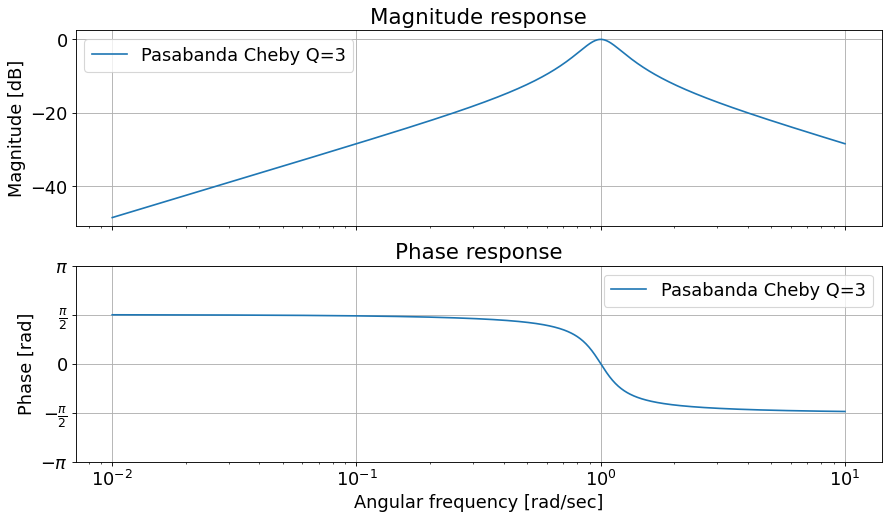

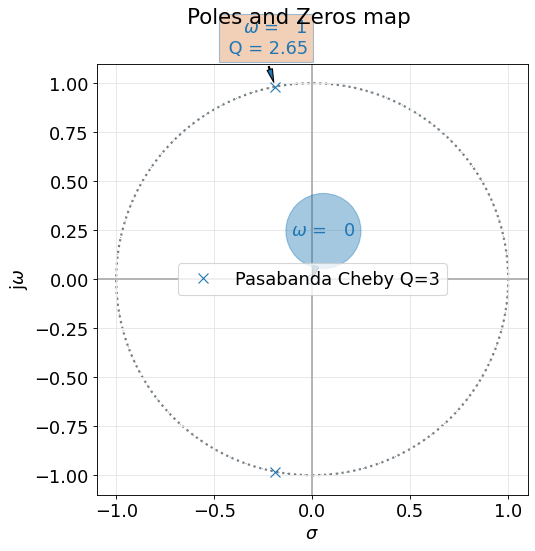

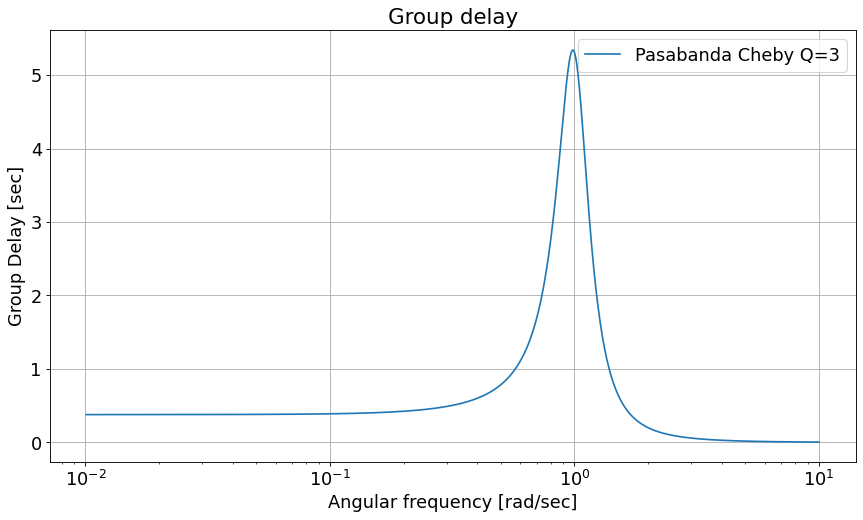

In [10]:
#Defino los parametros de la plantilla
w0=1
ws1=0.1
ws2=10

Ws= 29.7

alfa_max= 2.5   #en dB
alfa_min= 15    #en dB
Q_bp= 3

ee2= 10**(alfa_max/10) - 1

alfa=0
n=0

while(alfa<alfa_min):
    n+=1
    alfa= 10* np.log10(1 + (ee2 * np.cosh(n*np.arccosh(Ws))**2))

print("- Aproximacion de Chebyshev -")
print("Epsilon2= ",ee2)
print("Grado del filtro: ",n)

plt.close('all')

#Generacion del filtro

z,p,k= sig.cheb1ap(n, alfa_max)
num_lp, den_lp= sig.zpk2tf(z,p,k)
tf_lp= sig.TransferFunction(num_lp,den_lp)

sos_lp = tc2.tf2sos_analog(num_lp, den_lp)
print("\nTransferencia Pasabajos como SOS")
tc2.pretty_print_SOS(sos_lp)

#tc2.analyze_sys(tf_lp, sys_name="Prototipo Cheby Pasabajo")

#Transformacion a pasabanda

num_bp, den_bp= sig.lp2bp(num_lp, den_lp, bw = 1/Q_bp)
tf_bp= sig.TransferFunction(num_bp, den_bp)

sos_bp = tc2.tf2sos_analog(num_bp, den_bp)
print("\nTransferencia Pasabanda como SOS")
tc2.pretty_print_SOS(sos_bp)

tc2.analyze_sys(tf_bp, sys_name="Pasabanda Cheby Q=3")

### Valores de los componentes

Para el armado del circuito pasabanda utilizando el integrado UAF42 se siguió el circuito no inversor propuesto por el fabricante en la hoja de datos:

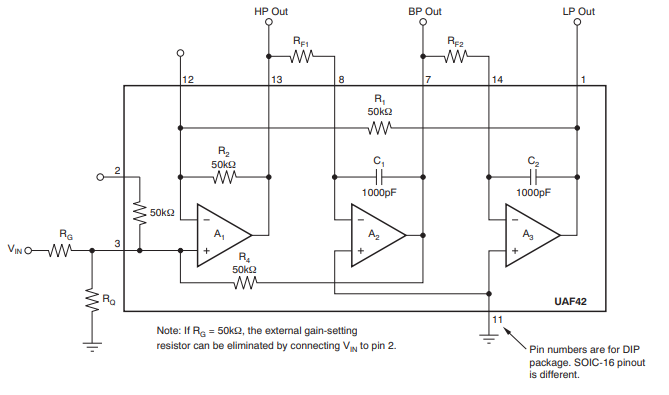

In [12]:
from IPython.display import IFrame
IFrame("./desarrollo_componentes.pdf", width=800, height=800)

# Simulación circuital

En las primeras imágenes se observa el circuito simulado, junto con el diagrama de bode correspondiente al mismo.

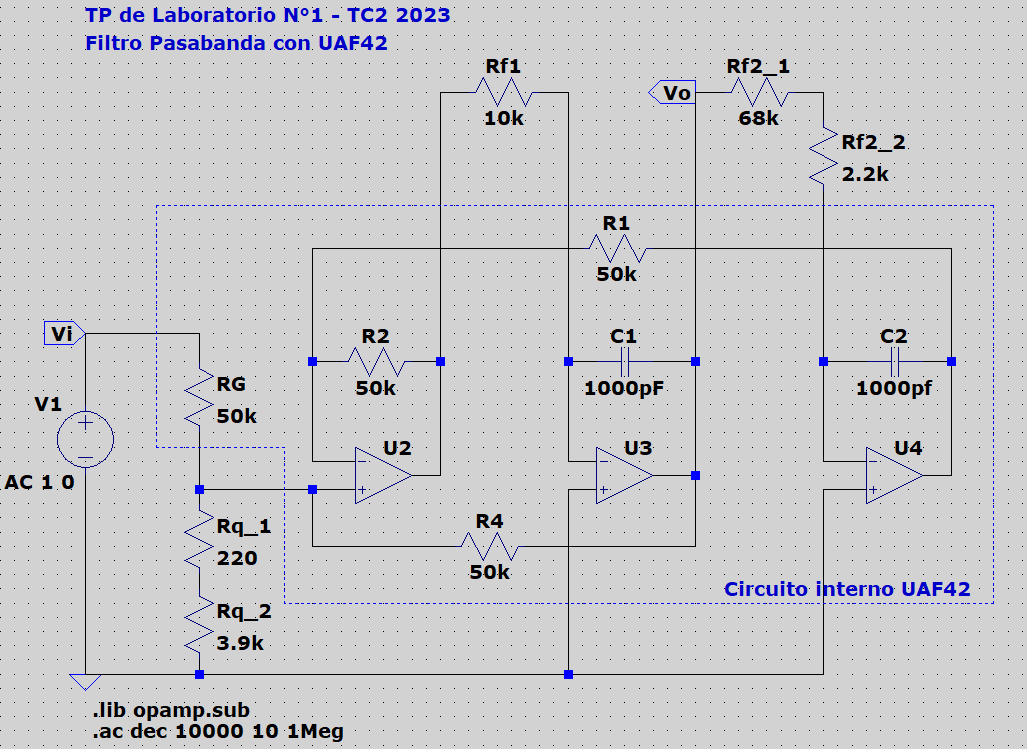

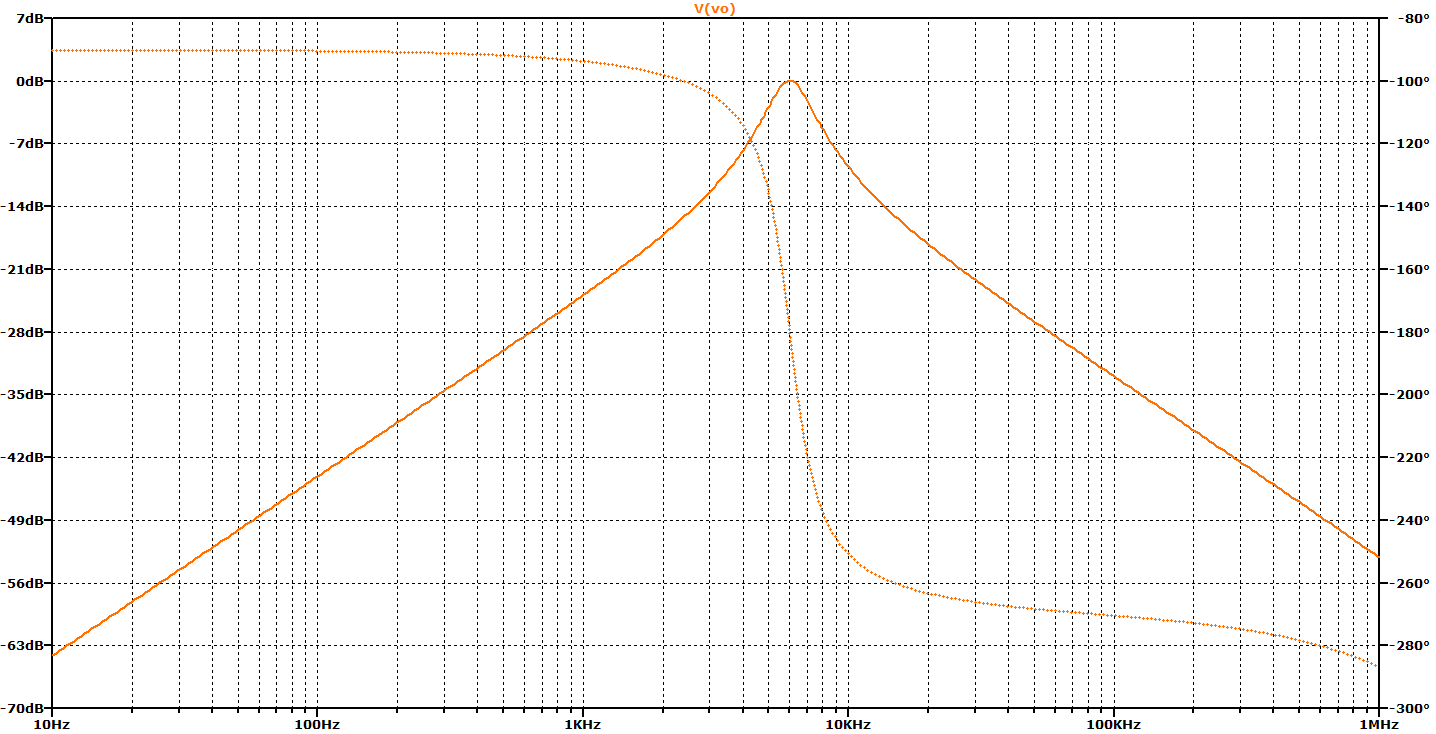

### Analisis de la banda de paso del filtro

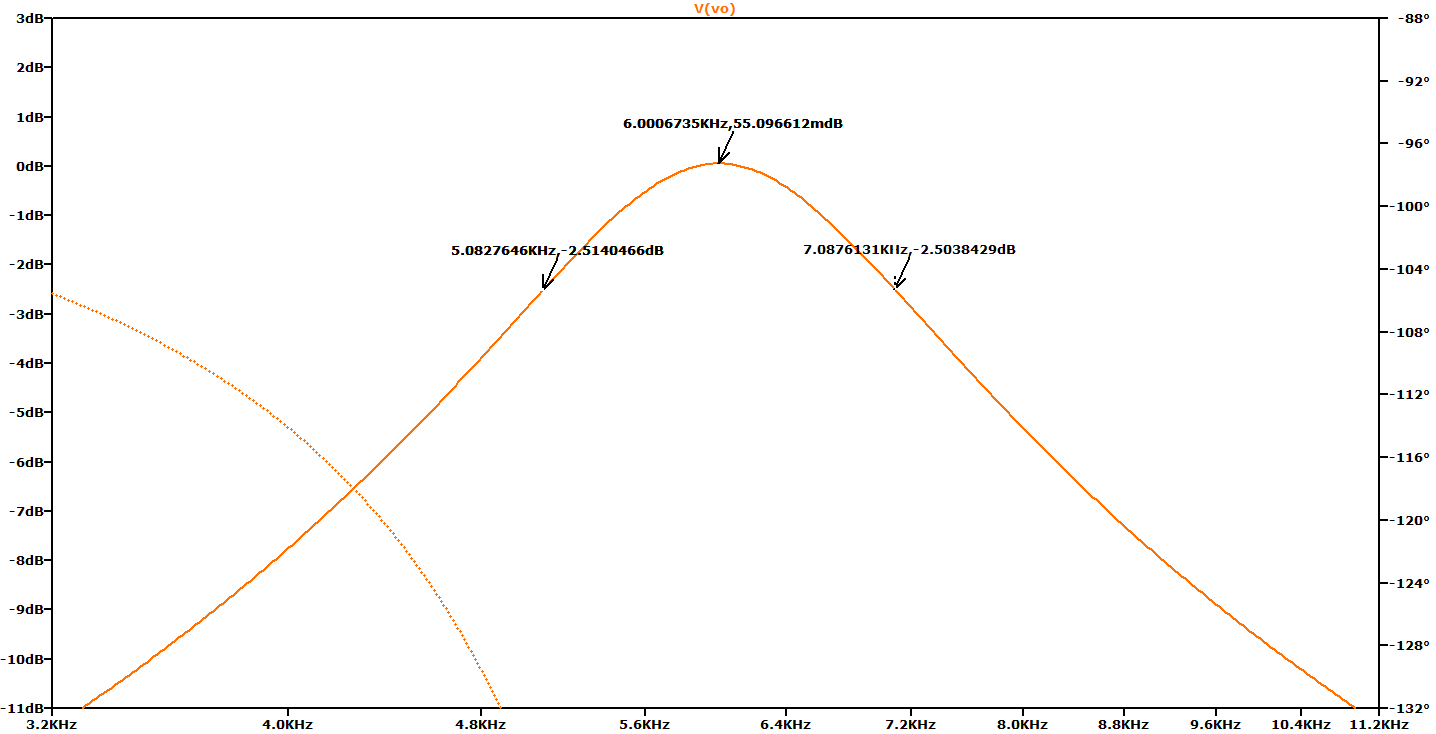

### Analisis de las bandas de eliminación del filtro

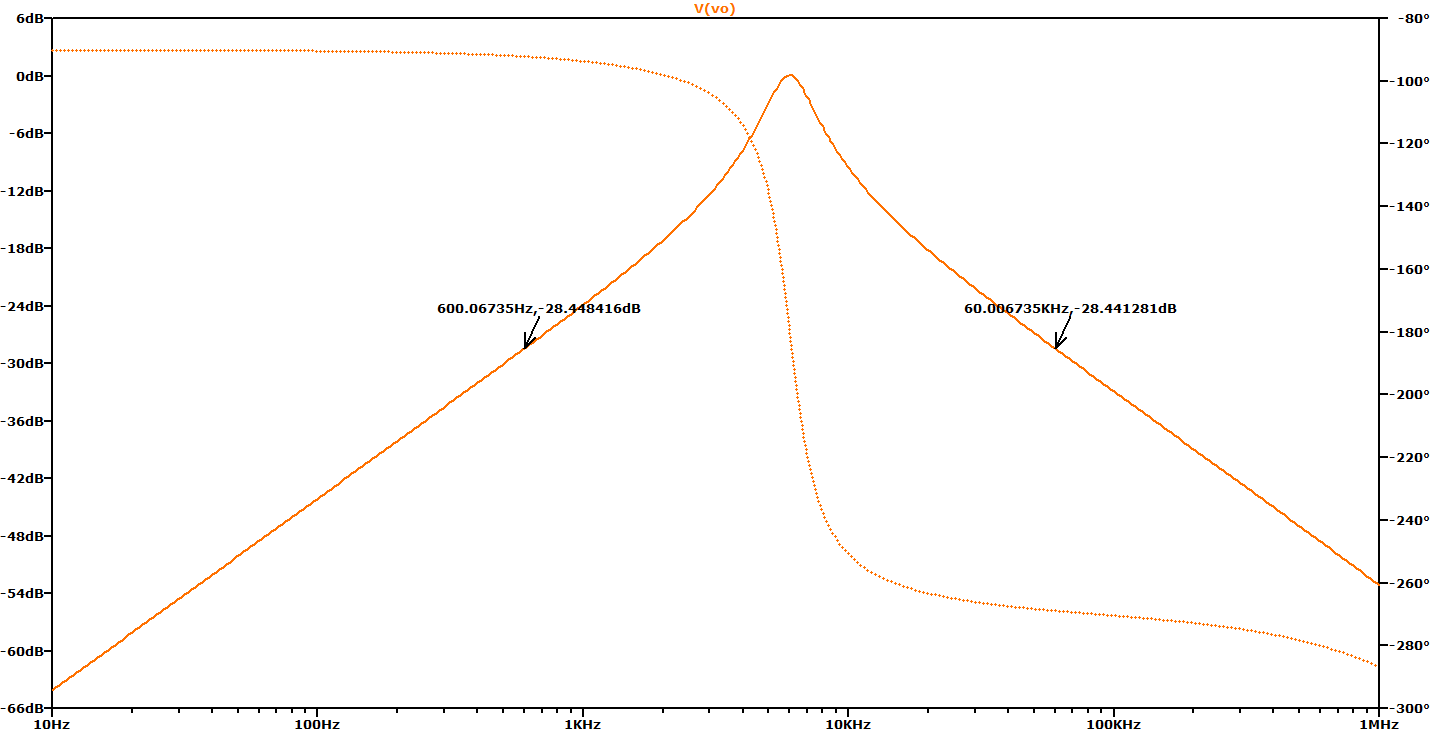

# Armado del circuito

### Esquemático

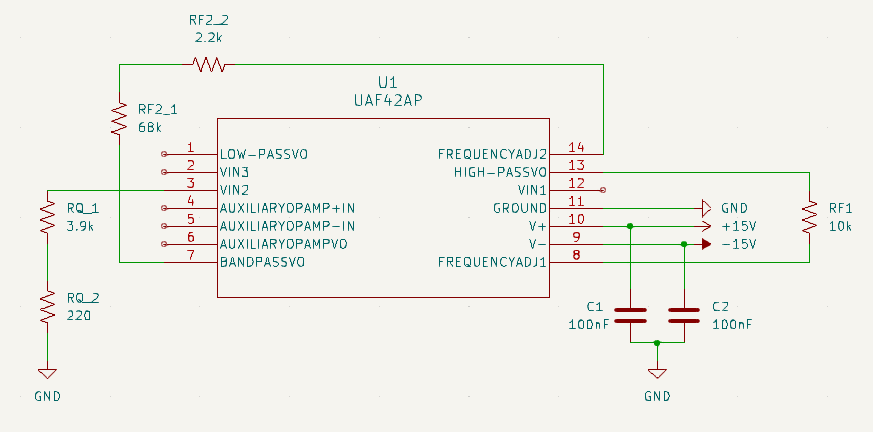

La tension de entrada se inyecta por el pin 2 del UAF42 mientras que la salida se mide en el pin 7 del integrado.

### Lista de componentes

|Componente|Tipo|Cantidad|
|:----------:|:----:|:--------:|
|Resistencia|68 kΩ|1|
|Resistencia|10 kΩ|1|
|Resistencia|3.9 kΩ|1|
|Resistencia|2.2 kΩ|1|
|Resistencia|220 Ω|1|
|Capacitor|100 nF|2|
|Zócalo|DIP14|1|
|Placa|Universal|1|



### Imágenes

- Frente de la placa

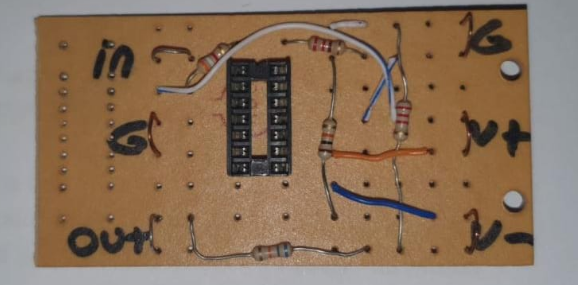

- Reverso de la placa

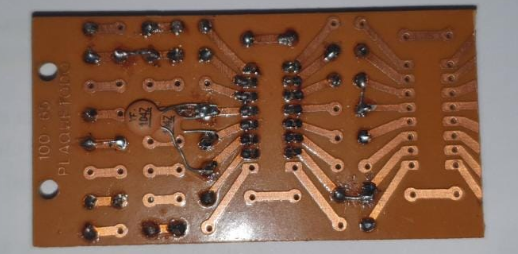

# Mediciones

### Diagrama del banco de ensayos

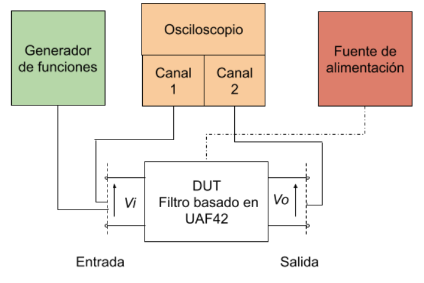

### Instrumental utilizado

|Instrumento|Marca|Modelo|Cantidad|
|:----------:|:----:|:--------:|:--------:|
|Fuente de alimentación|||2|
|Osciloscopio|GW Instek GDS-1102A-U||1|
|Generador de funciones|||1|

Las fuentes se utilizaron como fuente partida para lograr una tensión de alimentación de ±15V. Este valor se eligió teniendo en cuenta la especificacion del fabricante, el cuál detalla como valor máximo ±18V. Con la alimentación elegida se pueden lograr buenas mediciones ya que el rango dinámico permite que la señal no se recorte.

El generador de señales fue variando su frecuencia para poder efectuar el barrido, manteniendo una tensión senoidal de 10 Vpp

Luego de realizadas las mediciones individuales de cada equipo de trabajo se realizó un barrido en frecuencia con un analizador de audio marca XXX, modelo XXX.

### Procedimientos

#### 1. Medicion del módulo

Para la medicion del módulo se realizó un barrido en frecuencia desde XX Hz hasta XX Hz, tomando puntos intermedios en este intervalo para poder caracterizar correctamente la funcion transferencia. Se utilizaron puntas de prueba en los dos canales del osciloscopio, midiendo en el canal 1 la señal de entrada entregada por el generador de funciones, mientras que en el canal 2 se registró la señal de salida del circuito.

A partir de la tension de entrada y de salida, se realizo el cociente entre las mismas para poder determinar la ganancia del filtro en veces. Luego, mediante la formula $G_{[dB]} = 20\;\cdot\;log(G_{[veces]})$ se convierte el valor de la ganancia de veces a dB.

Con los datos conseguidos se puede graficar el diagrama de Bode para el modulo de la transferencia:

#### 2. Medición de la fase

Para medir la respuesta de fase del filtro se tomaron mediciones de la diferencia temporal entre los cruces por cero de las señales de salida y entrada. A partir de este desfasaje temporal, y sabiendo que un periodo de la señal representa $2\pi\;[rad]$ se puede calcular la fase del filtro aplicando:  <br><br>
$$ \phi_{[rad]} = 2\pi \cdot f \cdot \Delta t$$

Sin embargo, notamos que en la práctica el circuito invertía la fase, por lo que la fórmula utilizada finalmente fue: <br><br>
$$ \phi_{[rad]} = \pi - 2\pi \cdot f \cdot \Delta t$$


# Resultados

A continuación se muestran los graficos realizados a partir de los barridos en frecuencia realizados en el laboratorio. Puede observarse como se reproduce la forma anticipada en las simulaciones, respetando los parametros de diseño del filtro en la banda de paso y las bandas de eliminación.

### Barrido en frecuencia con osciloscopio y generador de señales

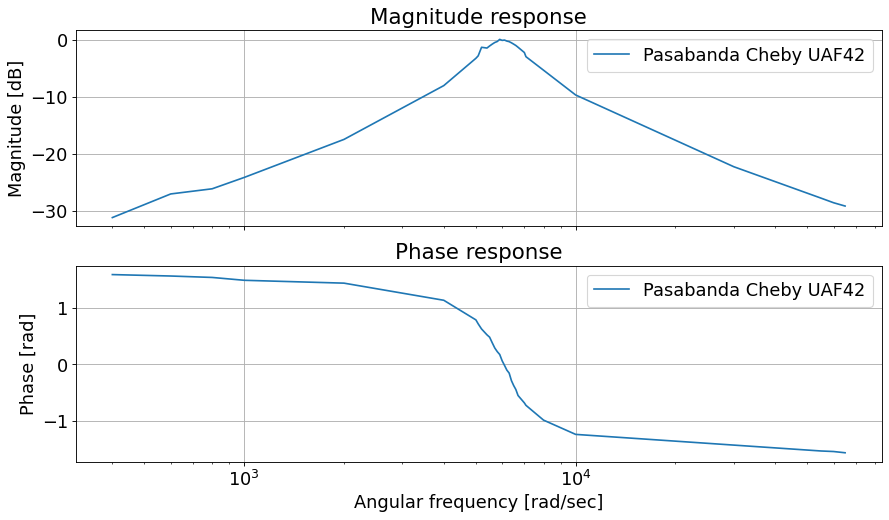

In [7]:
def bodePlot(modulo, fase, my_label, fig):
    '''
    Parameters
    ----------
    modulo : vector de 2 columnas
        Primera columna eje frecuencial, segunda ganancia en [dB]
    fase : vector de 2 columnas
        Primera columna eje frecuencial, segunda fase en [radianes]
    my_label : string
        Leyenda del grafico
    fig : int
        N° de figura

    Returns
    -------
    int
        DESCRIPTION.
    '''
    
    bode_plots= plt.figure(fig)
    mod_plot, fase_plot= bode_plots.subplots(2, 1, sharex=True)

    #bode_plots.suptitle('Diagramas de Bode')

    ## Ploteo el modulo
    plt.sca(mod_plot)
    mod_plot.plot(modulo[:,0], modulo[:,1], label=my_label)
    mod_plot.set(xscale='log')
    mod_plot.legend()
    mod_plot.grid()
    plt.ylabel('Magnitude [dB]')
    plt.title('Magnitude response')

    ## Ploteo la fase
    plt.sca(fase_plot)
    fase_plot.plot(fase[:,0], fase[:,1], label=my_label)
    fase_plot.set(xscale='log')
    fase_plot.legend()
    fase_plot.grid()
    plt.xlabel('Angular frequency [rad/sec]')
    plt.ylabel('Phase [rad]')
    plt.title('Phase response')
    plt.show()
    
    return None
#%%

#Levanto los archivos medidos del osciloscopio
modulo_osc= np.genfromtxt("./mediciones/modulo_osciloscopio.csv", delimiter=";")
fase_osc=   np.genfromtxt("./mediciones/fase_osciloscopio.csv", delimiter=";")


bodePlot(modulo_osc, fase_osc, 'Pasabanda Cheby UAF42', 1)

### Barrido en frecuencia utilizando el analizador de audio

Del mismo modo, se pueden levantar los datos provistos por el barrido en frecuencia del analizador de audio y graficarlos mediante Python:

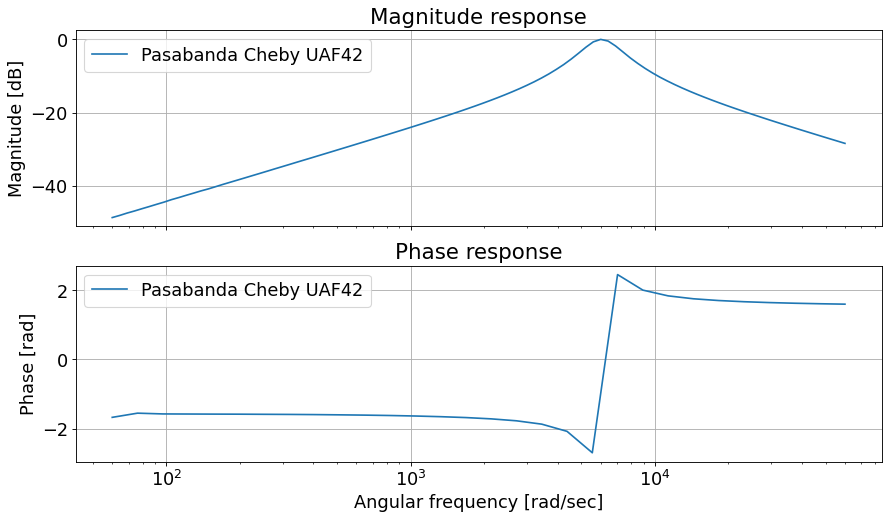

In [8]:
#Levanto los archivos del analizador de audio
modulo= np.genfromtxt("./mediciones/barrido_modulo.csv", delimiter=",")
fase=   np.genfromtxt("./mediciones/barrido_fase.csv", delimiter=",")
fase[:,1]= [item * np.pi/180 for item in fase[:,1] ] #Pasa de grados a radianes


bodePlot(modulo, fase, 'Pasabanda Cheby UAF42', 2)

# Conclusiones

- Conc1
- Conc2
- Conc3
- Conc4
- Conc5
